In [1]:
%load_ext autoreload

%autoreload 2
import sys
import numpy as np
import matplotlib.pyplot as plt
#import see_fits
import scipy
def binning(corner): return [[corner[i],corner[i+1]] for i in range(len(corner)-1)]
from scipy.ndimage import gaussian_filter
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import covariance as covar
import utils
import abundance as cl_count
import forecast
import pyccl as ccl
import edit
import h5py
Omega_c_true = 0.30711 - 0.048254
Omega_b_true = 0.048254
sigma8_true = .8288
Omegam_true = 0.30711
True_value = [Omega_c_true + Omega_b_true, sigma8_true]

In [2]:
#forecastF=edit.load_pickle('/pbs/throng/lsst/users/cpayerne/ClusterLikelihoods_data/Unbinned_likelihood/covariances/Fisher_covariance_.pickle')
forecastF=edit.load_pickle('/pbs/throng/lsst/users/cpayerne/ClusterLikelihoods_data/Unbinned_likelihood/covariances/Fisher_covariance_.pickle')

In [3]:
forecastF

{'4zx4m': {'Gaussian': array([[ 4.54048806e-04, -9.41322435e-05],
         [-9.41322435e-05,  3.04946473e-05]]),
  'Poissonian': array([[ 4.38815801e-04, -9.24370432e-05],
         [-9.24370432e-05,  3.02099427e-05]])},
 '10zx10m': {'Gaussian': array([[ 4.04964891e-04, -8.17983865e-05],
         [-8.17983865e-05,  2.74398219e-05]]),
  'Poissonian': array([[ 3.87873186e-04, -7.99105894e-05],
         [-7.99105894e-05,  2.71276098e-05]])},
 '30zx30m': {'Gaussian': array([[ 3.97003007e-04, -7.98115815e-05],
         [-7.98115815e-05,  2.69499690e-05]]),
  'Poissonian': array([[ 3.79749097e-04, -7.79141585e-05],
         [-7.79141585e-05,  2.66360007e-05]])},
 '60zx60m': {'Gaussian': array([[ 3.96264639e-04, -7.96282494e-05],
         [-7.96282494e-05,  2.69052204e-05]]),
  'Poissonian': array([[ 3.78995763e-04, -7.77292497e-05],
         [-7.77292497e-05,  2.65906522e-05]])},
 '100zx100m': {'Gaussian': array([[ 3.96206022e-04, -7.96009616e-05],
         [-7.96009616e-05,  2.68993847e-05]]

In [4]:
def binning(corner): return [[corner[i],corner[i+1]] for i in range(len(corner)-1)]
Omega_c_true = 0.30711 - 0.048254
Omega_b_true = 0.048254
sigma8_true = .8288
Omegam_true = 0.30711
True_value = [Omega_c_true + Omega_b_true, sigma8_true]

In [31]:
f=forecast.Forecast()
z_grid = np.linspace(0.2, 1.2, 2000)
logm_grid = np.linspace(15,15.6
                        , 2000)

In [32]:
clc = cl_count.ClusterAbundance()
clc.sky_area = (0.25)*4*np.pi
clc.f_sky = clc.sky_area/(4*np.pi)
clc.z_grid= z_grid
clc.logm_grid = logm_grid

In [33]:
F = f.Fisher_matrix_unbinned_Poissonian(True_value, [0.2,1.2], [15, 15.6], clc)

In [34]:
Cov_unbinned = np.linalg.inv(F)

In [35]:
Cov_unbinned

array([[ 3.74549108e-04, -7.70765480e-05],
       [-7.70765480e-05,  2.65190179e-05]])

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

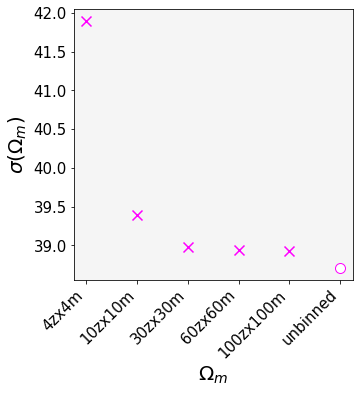

In [45]:
fig = plt.figure(figsize = (5,5))
ax = plt.axes()
ax.set_facecolor("whitesmoke")
#plt.yscale('log')
err_binned_SN = []
err_binned_SNSSC = []
for k in forecastF.keys():
    err_binned_SN.append(forecastF[k]['Poissonian'][0,0]**.5)
    err_binned_SNSSC.append(forecastF[k]['Gaussian'][0,0]**.5)

plt.scatter(forecastF.keys(), 20*np.array(err_binned_SN)*10**2, marker = 'x',s=100, c='magenta')
#plt.scatter(forecastF.keys(), np.array(err_binned_SNSSC), marker = 'x',s=100, c='magenta')
#plt.scatter(forecastF.keys(), np.array(err_binned_SN)/(Cov_unbinned[0,0]**.5)-1, marker = 'o',s=100, c='magenta')
#plt.plot(np.arange(len(forecastF.keys())), np.array(err_binned_SN)/(Cov_unbinned[0,0]**.5)-1,'--k')
#plt.scatter(forecastF.keys(), 100*(np.array(err_binned_SNSSC)/np.array(err_binned_SN)-1), marker='x',s=100, c='g')
#plt.plot(np.arange(len(forecastF.keys())), np.array(err_binned_SNSSC)/(Cov_unbinned[0,0]**.5)-1,'--k')
    #plt.scatter(k, err_GaussSSC**.5/np.linalg.inv(covUnbinned)[0,0]**.5, marker='o')
plt.scatter('unbinned', 20*Cov_unbinned[0,0]**.5*10**2, marker='o', s=100, c= 'w', edgecolors = 'magenta')
#plt.scatter('unbinned', 10**3*err_tot_unbinned, marker='x', s=100 , c= 'g')
plt.ylabel(r'$\sigma(\Omega_m)$', fontsize=20)
plt.xlabel(r'$\Omega_m$', fontsize=20)
plt.tick_params(axis='both', which = 'major', labelsize= 15)
plt.xticks(rotation=45,ha='right')
#plt.legend(frameon=True, fontsize=11, framealpha=.6, facecolor='white', loc= 'upper right')
#plt.savefig('err_forecast.pdf', bbox_inches='tight', dpi=300)